In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import json
soup = BeautifulSoup(open(r"mkbhdreviews.html"), "html.parser")
from textblob import TextBlob

In [2]:
all_scripts = soup.find_all('script')
#The 25th script contains the json we're interested in
text = str(all_scripts[25])

In [3]:
res = text.partition('window["ytInitialData"] = ')[2] 
res = res.replace(';\n    window["ytInitialPlayerResponse"] = null;\n    if (window.ytcsi) {window.ytcsi.tick("pdr", null, \'\');}\n  </script>','')

In [4]:
dataJson = json.loads(res)
VideoRenderer = dataJson['contents']['twoColumnBrowseResultsRenderer']['tabs'][0]['tabRenderer']['content']['sectionListRenderer']['contents'][0]['itemSectionRenderer']['contents'][0]['playlistVideoListRenderer']['contents']

In [5]:
videosList = []
for videoRender in VideoRenderer:
    video = {}
    video['videoId'] = str(videoRender['playlistVideoRenderer']['videoId'])
    video['title'] = videoRender['playlistVideoRenderer']['title']['runs'][0]['text']
    video['length'] = videoRender['playlistVideoRenderer']['lengthText']['simpleText']
    videosList.append(video)

In [6]:
df = pd.DataFrame(videosList)
df

,videoId,title,length
0,s8Un0XB_8xk,OnePlus 2 Review!,13:59
1,LObJOc5u7sY,Jaybird X2 Review: Best Bluetooth Earbuds!,4:21
2,9HDKRP4nzc0,Moto G 2015 Review!,5:32
3,cx20nTPZjes,Sony RX100 IV Review: Pocket 4K!,7:10
4,xpc07Lbgrow,GoPro Hero 4 Session Review!,6:35
...,...,...,...
187,2IIUHleexIk,Moto 360 V2 Review!,3:57
188,E357cGzOGLM,iPhone 6s Review!,10:06
189,gM_gTtll7FE,Moto X Pure (2015) Review!,7:58
190,V-nBAcr_huw,Samsung Galaxy Note 5 Review!,9:08


In [7]:
from youtube_transcript_api import YouTubeTranscriptApi
YouTubeTranscriptApi.get_transcript('XDamqi_3Aro')

[{'text': '[Music]', 'start': 0.36, 'duration': 3.64},
 {'text': "hey what's up", 'start': 3.36, 'duration': 3.439},
 {'text': 'mkbhd here first of all welcome to', 'start': 4.0, 'duration': 4.0},
 {'text': 'techtober', 'start': 6.799, 'duration': 3.92},
 {'text': "and i've been wearing this red apple",
  'start': 8.0,
  'duration': 4.08},
 {'text': 'watch series 6', 'start': 10.719, 'duration': 3.201},
 {'text': 'every day since the impressions video',
  'start': 12.08,
  'duration': 4.0},
 {'text': "now so been living with it i've worked",
  'start': 13.92,
  'duration': 4.16},
 {'text': "out with it i've slept with it on",
  'start': 16.08,
  'duration': 3.84},
 {'text': 'pretty much everything so this is the',
  'start': 18.08,
  'duration': 2.959},
 {'text': "full review oh by the way if you're",
  'start': 19.92,
  'duration': 1.92},
 {'text': 'wondering like hey', 'start': 21.039, 'duration': 2.721},
 {'text': 'what about the video about this other',
  'start': 21.84,
  'duratio

In [8]:
videoid_list = [i['videoId'] for i in videosList]

In [9]:
text_dict = {}
for i in videoid_list:
    try:
        transcript_list1 = YouTubeTranscriptApi.get_transcript(i)
    except Exception as e:
        print(e)
    newtranscript_list = [i['text'] for i in transcript_list1]
    vid_transcript = ' '.join(newtranscript_list)
    text_dict[i] = vid_transcript


Could not retrieve a transcript for the video https://www.youtube.com/watch?v=3GrIWdORHvc! This is most likely caused by:

No transcripts were found for any of the requested language codes: ('en',)

For this video (3GrIWdORHvc) transcripts are available in the following languages:

(MANUALLY CREATED)
None

(GENERATED)
 - ko ("Korean (auto-generated)")[TRANSLATABLE]

(TRANSLATION LANGUAGES)
 - af ("Afrikaans")
 - sq ("Albanian")
 - am ("Amharic")
 - ar ("Arabic")
 - hy ("Armenian")
 - az ("Azerbaijani")
 - bn ("Bangla")
 - eu ("Basque")
 - be ("Belarusian")
 - bs ("Bosnian")
 - bg ("Bulgarian")
 - my ("Burmese")
 - ca ("Catalan")
 - ceb ("Cebuano")
 - zh-Hans ("Chinese (Simplified)")
 - zh-Hant ("Chinese (Traditional)")
 - co ("Corsican")
 - hr ("Croatian")
 - cs ("Czech")
 - da ("Danish")
 - nl ("Dutch")
 - en ("English")
 - eo ("Esperanto")
 - et ("Estonian")
 - fil ("Filipino")
 - fi ("Finnish")
 - fr ("French")
 - gl ("Galician")
 - ka ("Georgian")
 - de ("German")
 - el ("Greek")



Could not retrieve a transcript for the video https://www.youtube.com/watch?v=x_R-qzjZrKQ! This is most likely caused by:

Subtitles are disabled for this video

If you are sure that the described cause is not responsible for this error and that a transcript should be retrievable, please create an issue at https://github.com/jdepoix/youtube-transcript-api/issues. Please add which version of youtube_transcript_api you are using and provide the information needed to replicate the error. Also make sure that there are no open issues which already describe your problem!

Could not retrieve a transcript for the video https://www.youtube.com/watch?v=0T0rop9pE58! This is most likely caused by:

Subtitles are disabled for this video

If you are sure that the described cause is not responsible for this error and that a transcript should be retrievable, please create an issue at https://github.com/jdepoix/youtube-transcript-api/issues. Please add which version of youtube_transcript_api you are u

In [10]:
for i in text_dict:
    text_dict[i] == text_dict[i].replace('[Music]','')

In [11]:
df2 = pd.DataFrame(text_dict.items(), columns=['videoId', 'text'])
df2.head()

,videoId,text
0,s8Un0XB_8xk,hey what is up guys um could be HD here and th...
1,LObJOc5u7sY,hey what's up guys I'm Kim PhD here and these ...
2,9HDKRP4nzc0,hey what is up guys in qHD here alright we hav...
3,cx20nTPZjes,hey what is up guys I'm could be HD here and t...
4,xpc07Lbgrow,hey what is up guys I'm Kim PhD here and every...


In [12]:
df_final = merge_attempt = pd.merge(df, df2, on='videoId', how='left')
df_final

,videoId,title,length,text
0,s8Un0XB_8xk,OnePlus 2 Review!,13:59,hey what is up guys um could be HD here and th...
1,LObJOc5u7sY,Jaybird X2 Review: Best Bluetooth Earbuds!,4:21,hey what's up guys I'm Kim PhD here and these ...
2,9HDKRP4nzc0,Moto G 2015 Review!,5:32,hey what is up guys in qHD here alright we hav...
3,cx20nTPZjes,Sony RX100 IV Review: Pocket 4K!,7:10,hey what is up guys I'm could be HD here and t...
4,xpc07Lbgrow,GoPro Hero 4 Session Review!,6:35,hey what is up guys I'm Kim PhD here and every...
...,...,...,...,...
187,2IIUHleexIk,Moto 360 V2 Review!,3:57,hey so I was just getting some work done the o...
188,E357cGzOGLM,iPhone 6s Review!,10:06,[Music] hey what's up guys I'm Kim PhD here an...
189,gM_gTtll7FE,Moto X Pure (2015) Review!,7:58,hey what is up guys I'm Kim PhD here and this ...
190,V-nBAcr_huw,Samsung Galaxy Note 5 Review!,9:08,[Music] hey what is up guys I'm qHD here and t...


In [13]:
df_final.replace('\[Music\]', ' ', regex=True, inplace = True)

# Adding Punctuations

In [15]:
import requests

url = "http://bark.phon.ioc.ee/punctuator"
headers = {
  'Content-Type': 'application/x-www-form-urlencoded'
}

for i, row in df_final.iterrows():
    payload = 'text='+df_final.iloc[i]['text']
    response = requests.request("POST", url, headers=headers, data = payload)
    df_final.at[i,'text'] = response.text.encode('utf8')

In [16]:
df_final.to_csv('mkbhd_corpus.csv', index = False)

# Start from here - read corpus

In [17]:
df = pd.read_csv('mkbhd_corpus.csv')
df.head(5)

,videoId,title,length,text
0,s8Un0XB_8xk,OnePlus 2 Review!,13:59,"b""Hey, what is up guys? Um could be HD here, a..."
1,LObJOc5u7sY,Jaybird X2 Review: Best Bluetooth Earbuds!,4:21,"b""Hey, what's up guys, I'm Kim PhD here, and t..."
2,9HDKRP4nzc0,Moto G 2015 Review!,5:32,"b""Hey what is up guys in qHD here? Alright, we..."
3,cx20nTPZjes,Sony RX100 IV Review: Pocket 4K!,7:10,"b""Hey what is up guys? I'M could be HD here, a..."
4,xpc07Lbgrow,GoPro Hero 4 Session Review!,6:35,"b""Hey what is up guys, I'm Kim PhD here and ev..."


In [18]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.corpus import inaugural
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from string import punctuation

In [19]:
def cleanAndPreProcess(speech):
    for char in '!#$%&@?,.:;+-*/=<>"\'()[\\]X{|}~\n\t¦¡§':
        speech = speech.replace(char, ' ')
    speech = speech.lower()
    word_list = speech.split()
    word_list = [w for w in word_list if w not in stop_words]
    return word_list

In [20]:
#Creating count of words in the speech
def PresidentVocabCheck(word_list):
    dict = {}                            # Initialize dictionary to create a word count
    for w in word_list:
        dict[w] = dict.get(w, 0) + 1
    return dict

In [21]:
def CalculateVocab(df):
    presVoc = pd.DataFrame()
    vocab_list = []
    for i, j in df.iterrows():
        speech = {}
        speech['videoId'] = df.iloc[i]['videoId']
        speech['title'] = df.iloc[i]['title']
        speech['words'] = len(PresidentVocabCheck(cleanAndPreProcess(df.iloc[i]['text']))) #Remove Len to get words
        speech['length'] = df.iloc[i]['length']
        vocab_list.append(speech)
    presVoc = pd.DataFrame(vocab_list)
    return presVoc

In [22]:
vocab = CalculateVocab(df)
highwords = vocab.sort_values(by='words', ascending=False).head(20)

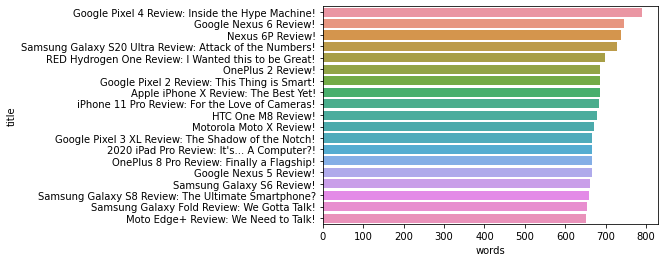

In [23]:
sns.barplot(x="words", y="title", data=highwords, dodge=False)

In [24]:
def wordCount(tweetstring):
    words = tweetstring.split()
    words = [w for w in words if w not in stop_words and len(w) > 2]
    words = [w for w in words if w not in ['amp', 'u']]
    words = [w for w in words if w.isalpha()]
    #return words

    # Get count of words
    freqdist = nltk.FreqDist(words)
    return freqdist

In [25]:
tweetstring = ''
for i in df.index:
    tweetstring = tweetstring + ' ' + df.loc[i, 'text']
freqdist = wordCount(tweetstring)

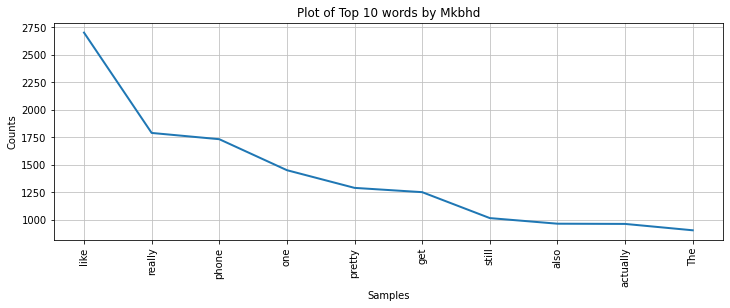

In [26]:
import matplotlib.pyplot as plot
plt.figure(figsize=(12,4))
freqdist.plot(10, cumulative=False, title='Plot of Top 10 words by Mkbhd')

In [27]:
#word_list = text.split()
#word_list = [w for w in word_list if w not in stop_words and len(w) > 2]
#words = [lemmatizer.lemmatize(w) for w in word_list]
    #words = [ps.stem(w) for w in words]
#text = ' '.join(words)
blob_object = TextBlob(tweetstring)
    
word_list_nouns = [word for word,pos in blob_object.tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
text = ' '.join(word_list_nouns)
text

"b Hey guys Um HD company phone name device part month weeks driver time lot people get flagship killer slogan hype look device place hardware lot decisions hardware department phone hand weight side scale smartphones nothing smartphone inch display metal band phone improvement band phone feel thin manufacturers nothing dear smartphone manufacturer camera module rest phone body battery phone everyone Extra battery thank shape sort boxy way hand phone sandstone default sandstone texture Unique bit year phone durability back back material drop look feel back access SIM card slot trays access battery storage SIM card slots one switch hand side slider profiles phone screen way notifications way priority Notifications way mode switch way way order settings course slider left power volume buttons hand side phone bit ridges anything kind power button They'Re tactile buttons week phone making mistakes power button try time option tap screen sleep top phone headphone jack kind bottom bottom pho

In [28]:
freqdistNoun = wordCount(text)

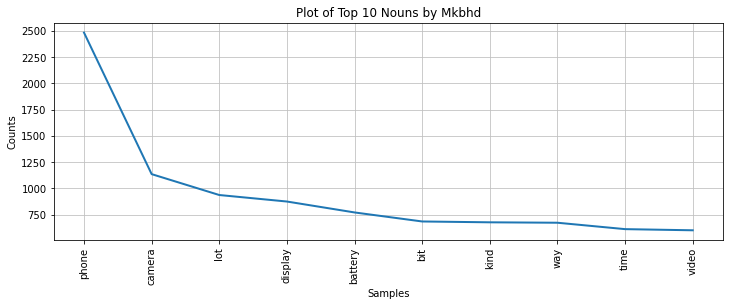

In [29]:
plt.figure(figsize=(12,4))
freqdistNoun.plot(10, cumulative=False, title='Plot of Top 10 Nouns by Mkbhd')

In [30]:
#Function to calculate the polarity/sentiment of every text
wordlist = []
for i in df.index:
    for char in '!#$%&@?,.:;+-*/=<>"\'()[\\]X{|}~\n\t':
        speech = df.loc[i, 'text'].replace(char, ' ')
        speech = speech.lower()
    wordlist.append(speech)
def SentimentAnalyzer():
    analyzer = SentimentIntensityAnalyzer()
    sentiment = {}
    polarity = [0]*len(wordlist)

    for i, word in enumerate(wordlist):
        word = word.strip(punctuation).lower()   #Strip punctuation and lower the words
        sentiment[i] = analyzer.polarity_scores(word)  #Analyse sentiment for every tweet
        polarity[i] = sentiment[i]['compound']
  
    df['polarity'] = polarity    #Add to Polarity column
SentimentAnalyzer()

In [33]:
df.sort_values(by=['polarity'], ascending=True)

,videoId,title,length,text,polarity
133,yiyjcXWZ3Qo,Huawei P30 Pro Review: Optical Excellence!,14:37,b'<html><title>400: Bad Request</title><body>4...,-0.7906
67,yRaIjn6q9Jo,LG Optimus G Review! (Nexus 4 Comparison),4:07,"b""Hey what's up guys mkbhd here tomorrow is Ne...",0.9364
40,tTxhneVcmEo,Samsung Galaxy Round Review!,6:34,"b""Hey what is up guys, I'm Kay Bhd here and fi...",0.9910
82,ngEoQzIqHMc,Chrome Beta for Android!,4:26,"b""Hey, what's up guys mkbhd here and welcome t...",0.9928
190,V-nBAcr_huw,Samsung Galaxy Note 5 Review!,9:08,"b""Hey, what is up guys, I'm qHD here - and thi...",0.9967
...,...,...,...,...,...
19,RoAPTdvgAJg,Google Nexus 6 Review!,17:02,"b""Hey, what's up guys, I'm Kim PhD here, and i...",1.0000
186,Xc5fFvp8le4,Nexus 6P Review!,13:29,"b""Hey what is up guys, i'm kim Bhd here - and ...",1.0000
141,bNLgikGu4Yw,RED Hydrogen One Review: I Wanted this to be G...,17:09,"b""[ Laughter ], what's up guys mkbhd here, and...",1.0000
108,LTDuGU38-70,OnePlus 8 Pro Review: Finally a Flagship!,15:39,"b""Hey, what's up guys, I'm Kip EHD here we're ...",1.0000


In [34]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [35]:
df2 = df
for i in df2.index:
    #df2.at[i,'text'] = ' '.join(df2.loc[i,'text'])
    df2.at[i,'text'] = ' '.join(cleanAndPreProcess(df2.iloc[i]['text']))

In [36]:
vec = TfidfVectorizer()
vec = TfidfVectorizer(stop_words='english')
vec = TfidfVectorizer(stop_words='english', max_df = 0.70, min_df =5)
tfidf = vec.fit_transform(df2['text'])

In [37]:

model = LDA(n_components=3, random_state = 42)
lda_fit = model.fit(tfidf)
terms = vec.get_feature_names()
topicList = []
for i, comp in enumerate(model.components_):
    #print(f"The topic would be {id_value}")
    lis = [terms[index] for index in comp.argsort()[-5:]]
    #print(lis)
    topicList.append(lis)
results = model.transform(tfidf)

In [38]:
topicList

[['headphones', 'beats', 'buds', 'earbuds', 'pods'],
 ['android', 'phones', 'google', 'galaxy', 'iphone'],
 ['earbuds', 'm50', 'cancellation', 'ears', 'title']]

In [39]:
sentence_list = nltk.sent_tokenize(df.iloc[5]['text'])

In [40]:
import spacy
nlp = spacy.load("en_core_web_sm")
#doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for i,rows in df.iterrows():
    doc = nlp(df.loc[i,'text'])
    for token in doc:
        if(token.pos_ == 'PROPN'):
            print(token.text, token.pos_, token.dep_)

flagship PROPN compound
slogan PROPN nsubj
use PROPN ccomp
oneplus PROPN nsubj
trays PROPN compound
sim PROPN compound
disturb PROPN amod
headphone PROPN compound
jack PROPN nsubj
kind PROPN advmod
wish PROPN ROOT
c PROPN compound
stereo PROPN compound
speaker PROPN compound
audio PROPN nsubj
right PROPN advmod
grill PROPN npadvmod
eqs PROPN dobj
type PROPN compound
c PROPN compound
macbook PROPN compound
chromebook PROPN compound
pixel PROPN nsubj
c PROPN compound
c PROPN npadvmod
home PROPN compound
quad PROPN amod
hd PROPN compound
know PROPN nsubj
quad PROPN amod
galaxy PROPN compound
s6 PROPN compound
quad PROPN amod
hd PROPN compound
galaxy PROPN compound
s6 PROPN compound
department PROPN dobj
sim PROPN compound
megapixel PROPN compound
camera PROPN compound
autofocus PROPN ROOT
laser PROPN compound
autofocus PROPN compound
talk PROPN ROOT
second PROPN advmod
milliamp PROPN compound
battery PROPN compound
fingerprint PROPN compound
reader PROPN compound
alert PROPN compound
slid

apple PROPN compound
watch PROPN ROOT
apple PROPN nmod
apple PROPN compound
watch PROPN compound
sport PROPN compound
apple PROPN compound
watch PROPN appos
apple PROPN compound
watch PROPN compound
millimeter PROPN compound
classic PROPN compound
mean PROPN compound
watch PROPN nsubj
apple PROPN nsubj
general PROPN amod
digital PROPN amod
digital PROPN amod
crown PROPN nmod
press PROPN compound
crown PROPN compound
button PROPN dobj
iphone PROPN compound
swipe PROPN compound
view PROPN compound
iphones PROPN compound
google PROPN compound
iphone PROPN compound
apple PROPN compound
watch PROPN nsubjpass
app PROPN nsubj
iphone PROPN dobj
apple PROPN compound
watch PROPN dobj
app PROPN compound
iphone PROPN compound
organization PROPN nsubj
weird PROPN amod
bubbly PROPN advmod
watch PROPN dobj
apple PROPN compound
bummer PROPN compound
third PROPN compound
party PROPN compound
apple PROPN compound
watch PROPN compound
grab PROPN ccomp
options PROPN dobj
app PROPN compound
iphone PROPN RO

hey PROPN nmod
kim PROPN appos
welcome PROPN compound
review PROPN conj
tablet PROPN appos
nexus PROPN npadvmod
nexus PROPN dobj
nexus PROPN npadvmod
nexus PROPN ROOT
nexus PROPN ROOT
sort PROPN compound
squarish PROPN npadvmod
nexus PROPN dobj
nexus PROPN dobj
button PROPN dobj
know PROPN ccomp
nexus PROPN dobj
sort PROPN advmod
nexus PROPN dobj
guess PROPN ROOT
help PROPN nsubj
nexus PROPN npadvmod
bit PROPN nmod
nexus PROPN ROOT
nvidia PROPN compound
shield PROPN relcl
spectacular PROPN advmod
nexus PROPN ccomp
megapixel PROPN compound
nexus PROPN npadvmod
nexus PROPN appos
google PROPN compound
nvidia PROPN compound
k1 PROPN compound
google PROPN compound
service PROPN compound
youtube PROPN compound
app PROPN nsubj
google PROPN nsubj
features PROPN compound
android PROPN nsubj
roll PROPN ccomp
nexus PROPN compound
nexus PROPN ROOT
white PROPN amod
nexus PROPN nmod
white PROPN nsubj
nexus PROPN npadvmod
nexus PROPN nsubj
nexus PROPN npadvmod
wi PROPN compound
nexus PROPN pobj
nvidi

hey PROPN nmod
hd PROPN dobj
moto PROPN nmod
new PROPN amod
moto PROPN compound
guy PROPN dobj
motorola PROPN compound
neat PROPN nsubj
antenna PROPN dobj
bunch PROPN conj
chicago PROPN dobj
moto PROPN nmod
le PROPN compound
bit PROPN npadvmod
motorola PROPN nsubj
motorola PROPN nsubj
google PROPN compound
wake PROPN compound
jarvis PROPN appos
motorola PROPN nsubj
moto PROPN compound
assist PROPN advcl
moto PROPN compound
actions PROPN dobj
moto PROPN compound
display PROPN compound
kind PROPN compound
snapdragon PROPN dobj
graphics PROPN compound
google PROPN compound
play PROPN compound
edition PROPN pobj
new PROPN amod
running PROPN compound
android PROPN compound
l PROPN nsubj
battery PROPN compound
life PROPN compound
motorola PROPN nmod
guy PROPN dobj
lot PROPN compound
times PROPN nsubj
lg PROPN compound
g3 PROPN nsubj
4k PROPN compound
motorola PROPN compound
moto PROPN ROOT
hey PROPN nmod
kim PROPN compound
phd PROPN nsubj
category PROPN dobj
moto PROPN nmod
ip67 PROPN pobj
b

hey PROPN nmod
que PROPN compound
phd PROPN compound
oppo PROPN nsubj
next PROPN amod
galaxy PROPN nmod
s5 PROPN nmod
galaxy PROPN compound
slim PROPN amod
screams PROPN ROOT
power PROPN compound
button PROPN dobj
button PROPN compound
chin PROPN dobj
right PROPN advmod
chin PROPN compound
apple PROPN pobj
skyline PROPN ccomp
chin PROPN compound
oppo PROPN compound
multicolor PROPN nsubj
os PROPN nsubj
oppo PROPN compound
n1 PROPN compound
oppo PROPN pobj
sony PROPN compound
os PROPN nsubj
themer PROPN nmod
homescreen PROPN compound
lockscreen PROPN nummod
themer PROPN nmod
faint PROPN compound
menu PROPN dobj
os PROPN compound
oppo PROPN nsubj
homescreen PROPN npadvmod
finger PROPN compound
map PROPN compound
launch PROPN compound
sony PROPN compound
z1 PROPN pobj
iphone PROPN advcl
5s PROPN compound
galaxy PROPN compound
s5 PROPN dobj
resolution PROPN nmod
max PROPN nmod
hd PROPN compound
ultra PROPN compound
hd PROPN nmod
kinda PROPN compound
skyline PROPN pobj
okay PROPN intj
hd PR

hey PROPN nmod
hd PROPN compound
moto PROPN compound
g PROPN nsubj
g PROPN dobj
moto PROPN compound
moto PROPN compound
g PROPN npadvmod
g PROPN dobj
data PROPN compound
wall PROPN compound
adapter PROPN compound
headphones PROPN compound
sim PROPN compound
moto PROPN compound
g PROPN det
moto PROPN compound
g PROPN dobj
moto PROPN compound
spec PROPN compound
sheet PROPN compound
show PROPN dobj
moto PROPN compound
g PROPN npadvmod
usa PROPN dobj
moto PROPN compound
g PROPN compound
sort PROPN compound
moto PROPN compound
moto PROPN compound
g PROPN nsubj
nano PROPN compound
sim PROPN compound
jelly PROPN compound
quad PROPN amod
core PROPN compound
snapdragon PROPN nsubj
quad PROPN ROOT
core PROPN compound
quad PROPN amod
core PROPN compound
snapdragon PROPN ROOT
responsiveness PROPN compound
moto PROPN nsubj
hue PROPN nsubj
ta PROPN aux
front PROPN compound
moto PROPN compound
g PROPN appos
720p PROPN compound
ips PROPN compound
snapdragon PROPN dative
le PROPN compound
display PROP

kay PROPN ROOT
bhd PROPN dobj
first PROPN advmod
iphone PROPN ROOT
5s PROPN compound
google PROPN compound
ios PROPN dobj
first PROPN amod
iphone PROPN compound
review PROPN dobj
believe PROPN acl
ado PROPN pobj
5s PROPN compound
ios PROPN dobj
galaxy PROPN nsubj
galaxy PROPN nmod
s4 PROPN dobj
galaxy PROPN compound
nexus PROPN pobj
hour PROPN compound
battery PROPN compound
iphone PROPN compound
galaxy PROPN nsubj
standby PROPN compound
times PROPN npadvmod
excellent PROPN amod
iphone PROPN nsubj
iphone PROPN advcl
iphone PROPN dobj
headphone PROPN compound
jack PROPN compound
lightning PROPN compound
port PROPN compound
speaker PROPN compound
grille PROPN compound
iphone PROPN dobj
iphone PROPN nsubj
iphone PROPN oprd
spec PROPN compound
sheet PROPN compound
iphone PROPN compound
5s PROPN compound
meet PROPN ROOT
samsung PROPN compound
galaxy PROPN compound
s2 PROPN compound
release PROPN compound
april PROPN npadvmod
gigahertz PROPN amod
gigabyte PROPN pobj
megapixel PROPN amod
mill

hey PROPN nmod
moto PROPN amod
google PROPN compound
motorola PROPN npadvmod
google PROPN nsubj
motorola PROPN dobj
mobility PROPN compound
ado PROPN dobj
motorola PROPN nsubj
samsung PROPN compound
galaxy PROPN compound
nexus PROPN compound
moto PROPN nsubj
nano PROPN compound
sim PROPN dobj
micro PROPN amod
sim PROPN nmod
galaxy PROPN compound
s4 PROPN pobj
headphone PROPN compound
jack PROPN compound
top PROPN nmod
headphone PROPN compound
jack PROPN nsubj
microphone PROPN compound
spec PROPN nsubj
x8 PROPN compound
gigahertz PROPN amod
snapdragon PROPN dobj
s4 PROPN nmod
pro PROPN advmod
adreno PROPN npadvmod
gpu PROPN compound
boss PROPN compound
guarantee PROPN pobj
well PROPN amod
handles PROPN dobj
handles PROPN ROOT
nexus PROPN nmod
google PROPN compound
chrome PROPN compound
google PROPN compound
chrome PROPN dobj
power PROPN compound
sucker PROPN npadvmod
lag PROPN nmod
lot PROPN nmod
lag PROPN compound
samsung PROPN compound
galaxy PROPN nmod
s4 PROPN compound
lot PROPN nmo

hey PROPN nmod
hd PROPN dobj
alex PROPN compound
es4 PROPN nsubj
gon PROPN ROOT
ado PROPN pobj
galaxy PROPN compound
mega PROPN amod
mega PROPN dep
galaxy PROPN compound
s4 PROPN nsubj
galaxy PROPN compound
mega PROPN nmod
leap PROPN compound
galaxy PROPN compound
note PROPN compound
galaxy PROPN nsubj
s4 PROPN npadvmod
kind PROPN advmod
buy PROPN relcl
samsung PROPN dobj
galaxy PROPN compound
mega PROPN nmod
flagship PROPN compound
specs PROPN compound
flagship PROPN nsubj
android PROPN ccomp
snapdragon PROPN appos
galaxy PROPN compound
s4 PROPN compound
snapdragon PROPN ROOT
galaxy PROPN compound
lineup PROPN dobj
galaxy PROPN compound
lineup PROPN nmod
mega PROPN npadvmod
galaxy PROPN compound
s4 PROPN dobj
megapixel PROPN amod
galaxy PROPN compound
galaxy PROPN compound
s3 PROPN appos
galaxy PROPN compound
mega PROPN ccomp
google PROPN compound
galaxy PROPN compound
s4 PROPN compound
design PROPN compound
galaxy PROPN nmod
s3 PROPN compound
specs PROPN compound
mid PROPN compound
g

galaxy PROPN compound
camera PROPN dobj
easiest PROPN amod
slap PROPN xcomp
megapixel PROPN amod
lens PROPN compound
flash PROPN compound
samsung PROPN compound
galaxy PROPN compound
cameras PROPN nsubj
sim PROPN compound
connect PROPN dobj
wi PROPN prep
google PROPN compound
jelly PROPN compound
galaxy PROPN compound
s3 PROPN compound
preview PROPN dobj
tech PROPN amod
shutter PROPN compound
miss PROPN dobj
autofocus PROPN advcl
galaxy PROPN compound
digital PROPN amod
zoom PROPN amod
compact PROPN amod
core PROPN compound
processor PROPN compound
camera PROPN appos
touchscreen PROPN nmod
android PROPN ROOT
instagram PROPN compound
apps PROPN compound
wi PROPN ROOT
wi PROPN ROOT
instagram PROPN compound
dropbox PROPN compound
gmail PROPN compound
google PROPN pobj
samsung PROPN nsubj
kind PROPN advmod
swung PROPN ccomp
samsung PROPN compound
galaxy PROPN compound
camera PROPN dobj
hey PROPN nmod
mkbhd PROPN nmod
google PROPN nmod
nexus PROPN appos
google PROPN compound
google PROPN ns

b PROPN compound
asus PROPN compound
transformer PROPN compound
pad PROPN compound
prime PROPN compound
prime PROPN nsubj
bam PROPN compound
hertz PROPN compound
quad PROPN nmod
core PROPN compound
tegra PROPN nmod
hd PROPN nsubj
youtube PROPN compound
wi PROPN prep
pad PROPN ccomp
back PROPN advmod
megapixel PROPN amod
speaker PROPN nsubj
prime PROPN amod
dock PROPN dobj
ips PROPN dobj
mean PROPN compound
asus PROPN nsubj
android PROPN oprd
android PROPN nsubj
tegra PROPN dobj
tegra PROPN ROOT
push PROPN compound
max PROPN compound
asus PROPN pobj
tablet PROPN acl
nexus PROPN nmod
asus PROPN compound
tegra PROPN nsubj
right PROPN amod
sign PROPN compound
google PROPN compound
account PROPN nsubj
google PROPN compound
ips PROPN nmod
right PROPN amod
story PROPN nsubj
decent PROPN amod
software PROPN nmod
jelly PROPN compound
hey PROPN nmod
kay PROPN ROOT
bhd PROPN dobj
ki PROPN compound
audio PROPN compound
m54 PROPN npadvmod
sound PROPN compound
bass PROPN compound
accurate PROPN amod

fastest PROPN amod
mac PROPN compound
video PROPN compound
mac PROPN compound
mini PROPN dobj
mouse PROPN compound
magic PROPN amod
mouse PROPN compound
magic PROPN compound
trackpad PROPN compound
cyborg PROPN nsubj
crown PROPN npadvmod
manual PROPN dobj
hexa PROPN compound
pinky PROPN amod
pinky PROPN compound
pinky PROPN amod
rest PROPN nmod
unscrewing PROPN amod
hex PROPN compound
bang PROPN compound
zone PROPN dobj
way PROPN advmod
dpi PROPN nsubj
cursor PROPN compound
middle PROPN amod
dpi PROPN compound
rocker PROPN nsubj
move PROPN conj
go PROPN ccomp
bow PROPN pobj
lefty PROPN nsubj
fastest PROPN amod
mac PROPN nmod
mini PROPN amod
series PROPN dobj
quad PROPN amod
core PROPN nmod
spun PROPN compound
megapixel PROPN amod
mini PROPN compound
hdmi PROPN compound
slot PROPN compound
headphone PROPN compound
jack PROPN compound
speaker PROPN compound
detail PROPN dobj
galaxy PROPN compound
nexus PROPN nsubj
specs PROPN compound
youtube PROPN compound
prime PROPN amod
tegra PROPN n

b PROPN compound
mkbhd PROPN amod
sony PROPN nsubj
sony PROPN nsubj
thing PROPN nmod
sony PROPN compound
app PROPN nsubj
mark PROPN compound
mark PROPN compound
iii PROPN nmod
sony PROPN compound
app PROPN dobj
like PROPN mark
eq PROPN compound
settings PROPN compound
notice PROPN compound
keyboard PROPN compound
brown PROPN compound
cup PROPN nsubj
iv PROPN advmod
mic PROPN compound
microphone PROPN compound
quality PROPN nmod
sony PROPN compound
nice PROPN advmod
mics PROPN compound
ear PROPN compound
cup PROPN dobj
sony PROPN compound
headphones PROPN dobj
app PROPN nsubj
red PROPN amod
matte PROPN nmod
cool PROPN amod
google PROPN compound
assistant PROPN compound
amazon PROPN nsubj
alexa PROPN compound
trigger PROPN compound
button PROPN compound
bottom PROPN amod
mark PROPN appos
iv PROPN dobj
sony PROPN nsubj
easy PROPN amod
review PROPN dobj
histogram PROPN compound
shirt PROPN dobj
sponsoring PROPN compound
b PROPN compound
kid PROPN compound
bhd PROPN nsubj
google PROPN compo

b PROPN compound
kip PROPN compound
ehd PROPN appos
tweet PROPN amod
iphone PROPN compound
gym PROPN compound
micro PROPN amod
iphone PROPN compound
gon PROPN dobj
specs PROPN compound
sabonis PROPN nsubj
iphone PROPN compound
new PROPN amod
iphone PROPN nsubj
mode PROPN compound
iphone PROPN dobj
ios PROPN nsubj
instagram PROPN dobj
instagram PROPN npadvmod
iphone PROPN ROOT
ios PROPN dobj
max PROPN ROOT
iphone PROPN dobj
se PROPN nsubj
kind PROPN advmod
3d PROPN amod
miss PROPN nsubj
3d PROPN compound
iphone PROPN nsubj
tim PROPN nsubj
tim PROPN amod
hope PROPN dobj
bit PROPN npadvmod
hertz PROPN compound
lidar PROPN compound
scanner PROPN dobj
iphone PROPN conj
september PROPN compound
october PROPN nsubj
hey PROPN intj
mkbhd PROPN compound
motorola PROPN appos
miss PROPN nsubj
moto PROPN npadvmod
droid PROPN compound
series PROPN nsubj
motorola PROPN compound
general PROPN nsubj
well PROPN intj
snapdragon PROPN nsubj
ufs PROPN ROOT
hertz PROPN npadvmod
motorola PROPN compound
rusty

hey PROPN nmod
kip PROPN compound
ehd PROPN nmod
lineup PROPN nmod
new PROPN amod
galaxy PROPN compound
flagship PROPN nmod
android PROPN compound
iphone PROPN compound
competitor PROPN nmod
big PROPN amod
phones PROPN ccomp
buddy PROPN amod
channel PROPN nsubj
ado PROPN pobj
galaxy PROPN nmod
samsung PROPN nsubj
new PROPN amod
samsung PROPN compound
board PROPN compound
hertz PROPN compound
hertz PROPN nmod
hertz PROPN dobj
know PROPN ROOT
battery PROPN compound
spoil PROPN compound
mm PROPN nsubj
ultra PROPN dep
hertz PROPN dobj
ultra PROPN nsubj
box PROPN nsubj
snapdragon PROPN pobj
miss PROPN compound
headphone PROPN nmod
headphone PROPN dobj
jack PROPN nsubj
samsung PROPN compound
headphone PROPN compound
headphone PROPN nmod
jack PROPN nmod
big PROPN amod
headphone PROPN compound
jack PROPN compound
wireless PROPN compound
house PROPN dobj
ta PROPN intj
headphone PROPN pobj
jack PROPN compound
megapixel PROPN amod
megapixel PROPN nmod
megapixel PROPN compound
telephoto PROPN advm

laser PROPN compound
autofocus PROPN compound
next PROPN amod
laser PROPN compound
autofocus PROPN compound
module PROPN nsubj
module PROPN compound
snapdragon PROPN dobj
macro PROPN amod
mode PROPN compound
hardware PROPN compound
macro PROPN compound
mode PROPN compound
hertz PROPN npadvmod
ufs PROPN advcl
new PROPN amod
compete PROPN amod
pixel PROPN dobj
g PROPN compound
mclaren PROPN compound
edition PROPN dobj
mclaren PROPN nmod
papaya PROPN compound
orange PROPN compound
accents PROPN dobj
mclaren PROPN nsubj
mclaren PROPN compound
mclaren PROPN compound
edition PROPN dobj
ram PROPN nmod
mclaren PROPN compound
edition PROPN compound
north PROPN compound
america PROPN dobj
south PROPN compound
super PROPN amod
gon PROPN dobj
link PROPN compound
channel PROPN nsubj
franco PROPN nsubj
gon PROPN aux
october PROPN compound
october PROPN compound
tech PROPN compound
tober PROPN compound
b PROPN compound
mkbhd PROPN nsubj
bet PROPN ROOT
ceo PROPN compound
microsoft PROPN dobj
apple PRO

polka PROPN amod
polka PROPN amod
mean PROPN nsubj
red PROPN amod
box PROPN compound
iaomi PROPN nsubj
iaomi PROPN nmod
mean PROPN parataxis
snapdragon PROPN nmod
google PROPN compound
account PROPN nsubj
read PROPN ccomp
k PROPN dobj
k PROPN dobj
k PROPN npadvmod
iaomi PROPN nmod
k PROPN quantmod
c PROPN nsubj
pop PROPN compound
selfie PROPN compound
underneath PROPN prep
snapdragon PROPN dobj
notches PROPN nsubj
underneath PROPN prep
pop PROPN compound
selfie PROPN compound
camera PROPN dobj
app PROPN compound
light PROPN amod
selfie PROPN compound
camera PROPN nsubj
k20 PROPN nsubj
megapixel PROPN appos
telephoto PROPN appos
megapixel PROPN amod
sony PROPN nsubj
amx PROPN ROOT
noise PROPN compound
snapdragon PROPN nsubj
first PROPN amod
search PROPN compound
keyboard PROPN compound
par PROPN compound
box PROPN nmod
sweet PROPN amod
k PROPN det
mono PROPN amod
speaker PROPN nmod
bottom PROPN nmod
selfie PROPN compound
camera PROPN dobj
headphone PROPN nmod
jack PROPN nmod
nice PROPN 

hey PROPN nmod
kabhi PROPN ROOT
hd PROPN dobj
guy PROPN dobj
daily PROPN amod
sim PROPN compound
huawei PROPN compound
cop PROPN relcl
ta PROPN nsubj
channel PROPN compound
sponsor PROPN compound
addy PROPN compound
power PROPN compound
blaster PROPN compound
ir PROPN prep
ip68 PROPN compound
usb PROPN compound
c PROPN nmod
speaker PROPN compound
grille PROPN compound
check PROPN compound
speaker PROPN dobj
usb PROPN compound
c PROPN compound
grille PROPN nsubj
speaker PROPN npadvmod
usb PROPN compound
c PROPN compound
samsung PROPN nsubj
qualcomm PROPN compound
snapdragon PROPN compound
kirin PROPN ccomp
s9 PROPN pobj
weighs PROPN compound
flash PROPN nsubj
megapixel PROPN amod
telephoto PROPN nsubj
sensor PROPN nmod
megapixel PROPN amod
mark PROPN compound
nova PROPN nsubj
ios PROPN dobj
share PROPN conj
sheet PROPN compound
gen PROPN amod
bunch PROPN compound
hey PROPN nmod
bhd PROPN appos
google PROPN compound
laptop PROPN dobj
channel PROPN dobj
8k PROPN appos
mac PROPN nmod
os PR

iphone PROPN compound
samsung PROPN compound
galaxy PROPN compound
series PROPN pobj
series PROPN nsubj
big PROPN amod
first PROPN amod
apple PROPN compound
lte PROPN nmod
gen PROPN nsubj
mic PROPN nsubj
watch PROPN dobj
os PROPN ROOT
link PROPN compound
design PROPN compound
infograph PROPN compound
watch PROPN compound
promo PROPN compound
infograph PROPN dobj
watch PROPN nsubj
sized PROPN ccomp
bin PROPN compound
metal PROPN compound
camera PROPN npadvmod
s4 PROPN compound
syria PROPN nsubj
speaker PROPN compound
matter PROPN nsubj
walkie PROPN compound
talkie PROPN compound
walkie PROPN compound
talkie PROPN compound
mode PROPN nsubj
enable PROPN ccomp
throwback PROPN compound
nextel PROPN compound
accelerometer PROPN compound
gyroscope PROPN pobj
wrist PROPN compound
apple PROPN nsubj
crown PROPN compound
connect PROPN compound
circuit PROPN compound
ekg PROPN compound
apple PROPN nsubj
app PROPN compound
google PROPN compound
go PROPN relcl
lte PROPN dobj
iphone PROPN compound
kn

hey PROPN nmod
samsung PROPN compound
galaxy PROPN nmod
s8 PROPN compound
infinity PROPN compound
display PROPN compound
year PROPN nmod
galaxy PROPN nmod
jack PROPN compound
finger PROPN compound
dave PROPN compound
2d PROPN nsubj
galaxy PROPN nmod
bixby PROPN compound
pixel PROPN compound
iris PROPN compound
combines PROPN ROOT
iris PROPN compound
app PROPN nsubj
shortcuts PROPN compound
bixby PROPN compound
bixby PROPN compound
button PROPN dobj
bixby PROPN amod
bixby PROPN compound
button PROPN compound
bixby PROPN dobj
bixby PROPN nsubj
understands PROPN advcl
s9 PROPN compound
s9 PROPN nsubj
kind PROPN amod
picky PROPN advmod
charger PROPN compound
megapixel PROPN amod
telephoto PROPN compound
f PROPN quantmod
f PROPN quantmod
f PROPN quantmod
f PROPN quantmod
pixel PROPN compound
iphone PROPN pobj
galaxy PROPN compound
camera PROPN dobj
rec PROPN nmod
rec PROPN ccomp
rec PROPN acomp
galaxy PROPN nmod
galaxy PROPN nmod
s9 PROPN nmod
s9 PROPN dobj
telephoto PROPN compound
focus PR

hey PROPN nmod
kim PROPN nsubj
phd PROPN dobj
google PROPN compound
home PROPN compound
max PROPN compound
google PROPN ccomp
puck PROPN compound
speaker PROPN dative
google PROPN compound
home PROPN nmod
google PROPN compound
home PROPN compound
max PROPN dobj
apple PROPN compound
home PROPN compound
pod PROPN dobj
kind PROPN compound
white PROPN amod
charcoal PROPN compound
bookshelves PROPN nsubj
channel PROPN compound
google PROPN compound
home PROPN compound
jack PROPN compound
plug PROPN nmod
c PROPN compound
white PROPN amod
google PROPN compound
google PROPN compound
home PROPN compound
trippy PROPN ROOT
google PROPN compound
tall PROPN amod
google PROPN compound
home PROPN advmod
lot PROPN appos
rich PROPN amod
punchy PROPN nsubj
equalizer PROPN compound
speaker PROPN compound
wall PROPN pobj
somewhere PROPN amod
corner PROPN nsubj
alexa PROPN compound
google PROPN compound
learning PROPN amod
google PROPN compound
assistant PROPN nsubj
google PROPN compound
google PROPN compo

hey PROPN nmod
kabhi PROPN ROOT
hd PROPN compound
phone PROPN compound
galaxy PROPN nsubj
galaxy PROPN nsubj
galaxy PROPN nsubj
refinement PROPN compound
edges PROPN ccomp
aluminum PROPN compound
rail PROPN nsubj
hold PROPN ROOT
bump PROPN compound
mean PROPN nsubj
kind PROPN advmod
glass PROPN compound
sandwich PROPN compound
reader PROPN compound
middle PROPN amod
galaxy PROPN nsubj
galaxy PROPN nmod
resolution PROPN conj
phones PROPN dobj
wonder PROPN compound
display PROPN compound
department PROPN compound
galaxy PROPN nsubj
box PROPN compound
camera PROPN nsubj
megapixel PROPN nmod
f PROPN quantmod
megapixel PROPN compound
f PROPN quantmod
miss PROPN dobj
photo PROPN nsubj
main PROPN amod
snapdragon PROPN pobj
adreno PROPN compound
mean PROPN compound
wish PROPN compound
google PROPN nsubj
play PROPN compound
kind PROPN compound
specs PROPN nsubj
inside PROPN prep
galaxy PROPN nsubj
galaxy PROPN nsubj
milliamp PROPN compound
use PROPN compound
stylus PROPN compound
fit PROPN comp

ehd PROPN compound
earpods PROPN appos
iphone PROPN pobj
w1 PROPN nmod
w1 PROPN compound
bluetooth PROPN amod
pair PROPN compound
iphone PROPN nsubj
iphone PROPN amod
pairs PROPN nsubj
earbuds PROPN compound
activate PROPN compound
siri PROPN compound
iphone PROPN compound
mac PROPN compound
use PROPN nmod
microphone PROPN npadvmod
iphone PROPN dobj
us PROPN dative
day PROPN compound
j PROPN compound
bird PROPN compound
x3s PROPN nsubj
proximity PROPN compound
hey PROPN nmod
laptop PROPN nsubj
new PROPN amod
keyboard PROPN nmod
max PROPN dobj
retina PROPN compound
new PROPN amod
keyboard PROPN compound
arrow PROPN compound
speaker PROPN pobj
touchscreen PROPN nsubj
app PROPN pobj
rightmost PROPN compound
arrow PROPN compound
show PROPN dobj
sliders PROPN nsubj
timeline PROPN advcl
quicktime PROPN compound
videos PROPN compound
library PROPN compound
safari PROPN nsubj
middle PROPN nsubj
safari PROPN amod
middle PROPN amod
quicktime PROPN compound
youtube PROPN compound
instagram PROPN 

hey PROPN nmod
mp PROPN ROOT
snapdragon PROPN nmod
gpu PROPN nmod
slider PROPN dobj
magnets PROPN nsubj
classic PROPN ROOT
os PROPN nsubj
quad PROPN amod
slowdowns PROPN dobj
audrina PROPN acl
galaxy PROPN compound
s7 PROPN compound
ish PROPN compound
nexus PROPN nsubj
feel PROPN ccomp
lot PROPN nmod
google PROPN nsubj
launcher PROPN amod
screen PROPN compound
google PROPN compound
refresh PROPN compound
google PROPN compound
google PROPN compound
specs PROPN compound
android PROPN compound
fast PROPN amod
flash PROPN compound
nexus PROPN compound
6p PROPN pobj
find PROPN ROOT
b PROPN compound
milliamp PROPN compound
ta PROPN nsubj
sexy PROPN nsubj
galaxy PROPN compound
s7 PROPN nsubj
mean PROPN nsubj
galaxy PROPN compound
s7 PROPN compound
megapixel PROPN amod
sony PROPN compound
sensor PROPN dobj
f PROPN nmod
autofocus PROPN compound
quickness PROPN compound
app PROPN nsubj
mark PROPN nmod
good PROPN amod
camera PROPN ccomp
google PROPN compound
nfc PROPN dobj
groundbreaking PROPN cs

neat PROPN amod
lugs PROPN nsubj
right PROPN amod
box PROPN nsubj
omap PROPN amod
snapdragon PROPN dative
gpu PROPN compound
smartwatch PROPN compound
lcd PROPN compound
huawei PROPN compound
watch PROPN pobj
smartwatch PROPN compound
guy PROPN nsubj
hey PROPN nmod
kim PROPN ROOT
phd PROPN compound
iphone PROPN dobj
6s PROPN nsubj
iphone PROPN nmod
iphone PROPN ccomp
fcc PROPN compound
6s PROPN nsubjpass
fcc PROPN compound
badge PROPN compound
guess PROPN nsubj
iphone PROPN nmod
mean PROPN ccomp
alright PROPN npadvmod
series PROPN compound
button PROPN compound
placement PROPN compound
headphone PROPN compound
jack PROPN compound
mute PROPN compound
new PROPN amod
iphone PROPN dobj
iphone PROPN amod
unlock PROPN compound
button PROPN dobj
big PROPN amod
6s PROPN dobj
3gs PROPN pobj
apple PROPN nsubj
rockin PROPN nmod
apple PROPN nmod
new PROPN amod
a9 PROPN compound
cue PROPN compound
gigahertz PROPN pobj
ios PROPN dobj
day PROPN compound
iphones PROPN dative
iphone PROPN compound
6s P

In [51]:
for i,rows in df.iterrows():
    doc = nlp(df.loc[i,'title'])
    possibleProduct = ''
    for token in doc:
        if(token.pos_ == 'PROPN' or token.pos_ == 'NOUN' or token.pos_ == 'NUM'):
            possibleProduct = possibleProduct + ' ' + token.text
            #print(token.text, token.pos_, token.dep_)
    df.loc[i,'Product'] = possibleProduct.replace('Review','')
    #print(possibleProduct.replace('Review',''))

In [52]:
df.head(10)

,videoId,title,length,text,polarity,Product,Prices
0,s8Un0XB_8xk,OnePlus 2 Review!,13:59,b hey guys um could hd oneplus 2 company named...,0.9999,OnePlus 2,NaN
1,LObJOc5u7sY,Jaybird X2 Review: Best Bluetooth Earbuds!,4:21,b hey guys kim phd j bird 2 bluetooth earbuds ...,0.9998,Jaybird X2 Best Bluetooth Earbuds,200 bucks
2,9HDKRP4nzc0,Moto G 2015 Review!,5:32,b hey guys qhd alright pretty great smartphone...,0.9995,Moto G 2015,2 400 bucks
3,cx20nTPZjes,Sony RX100 IV Review: Pocket 4K!,7:10,b hey guys could hd sequel best pocket camera ...,0.9995,Sony RX100 IV Pocket 4 K,NaN
4,xpc07Lbgrow,GoPro Hero 4 Session Review!,6:35,b hey guys kim phd every single gopro first on...,0.9997,GoPro Hero 4 Session,NaN
5,orPHNS-0CZI,iPod Touch 2015 Review!,4:53,b totally meant hey guys cubby hd finally new ...,0.9993,iPod Touch 2015,NaN
6,TA8JprZlDYA,2015 Macbook Review!,8:13,b hey guys qhd 2015 macbook new macbook review...,0.9998,2015 Macbook,NaN
7,UrzhzCA1NUw,HTC One M9+ (& S6 Plus!),4:10,b right htc one m9 samsung galaxy note 4 baby ...,0.9992,HTC One M9 S6 Plus,NaN
8,VTUDzrIgZlI,LG G4 Review!,11:29,b hey guys cabbie hd lg g4 killing lg big brig...,0.9999,LG G4,NaN
9,dPL1-8ypnEs,Apple Watch Review!,7:10,b okay apple watch apple first attempt wearabl...,0.9998,Apple Watch,NaN


In [53]:
for i,rows in df.iterrows():
    possiblePrices = []
    doc = nlp(df.loc[i,'text'])
    for ent in doc.ents:
        if(ent.label_ == 'MONEY'):
            possiblePrices.append(ent.text)
            df.loc[i,'Prices'] = possiblePrices
        #print(ent.text, ent.start_char, ent.end_char, ent.label_)

ValueError: Must have equal len keys and value when setting with an iterable

In [43]:
df['Prices'].head(15)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
Name: Prices, dtype: float64

In [ ]:
df.to_excel('reviewsproductsAndPrices.xlsx')

In [54]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

2 400 bucks 80 91 MONEY
300 bucks 140 149 MONEY
couple months 166 179 DATE
3 202 203 CARDINAL
2 217 218 CARDINAL
one 227 230 CARDINAL
motorola 242 250 ORG
moto g 309 315 PRODUCT
motorola 345 353 ORG
motorola 435 443 ORG
2015 463 467 DATE
last year 487 496 DATE
two 535 538 CARDINAL
179 555 558 CARDINAL
1 580 581 CARDINAL
220 590 593 CARDINAL
16 594 596 CARDINAL
gigabyte model 2 597 613 PRODUCT
200 682 685 CARDINAL
5 859 860 CARDINAL
6 13 1055 1059 CARDINAL
4k 1105 1107 CARDINAL
one meter 1499 1508 QUANTITY
30 minutes 1515 1525 TIME
6 1639 1640 CARDINAL
five inch 1805 1814 QUANTITY
720p 1815 1819 PRODUCT
last year 1846 1855 DATE
410 1954 1957 CARDINAL
first 2058 2063 ORDINAL
six hours 2249 2258 TIME
night 2364 2369 TIME
next day 2393 2401 DATE
810 2535 2538 CARDINAL
2 2661 2662 CARDINAL
motorola 2765 2773 ORG
classic 2952 2959 PRODUCT
motorola 2973 2981 ORG
app 3011 3014 ORG
one 3259 3262 CARDINAL
720p 3374 3378 PRODUCT
200 ish dollar 3528 3542 MONEY
daily 3554 3559 DATE
five 3574 3578 C

In [55]:
Organisations = []
for i,rows in df.iterrows():
    doc = nlp(df.loc[i,'text'])
    for ent in doc.ents:
        if(ent.label_ == 'ORG'):
            Organisations.append(ent.text)

In [56]:
from collections import Counter
d = Counter(Organisations)
orgdf = pd.DataFrame.from_dict(d, orient='index').reset_index()
orgdf.rename(columns={'index':'org', 0:'count'}, inplace=True)
orgdf[orgdf['count']>10].sort_values(by='count', ascending=True)

,org,count
43,samsung galaxy,11
107,microsoft,12
25,apple,23
3,samsung,33
12,ios,35
155,hertz,36
70,pixel,53
27,mac,55
7,sony,66
6,motorola,79


In [57]:
orgdfTop10 = orgdf.sort_values(by='count', ascending=False).head(10)

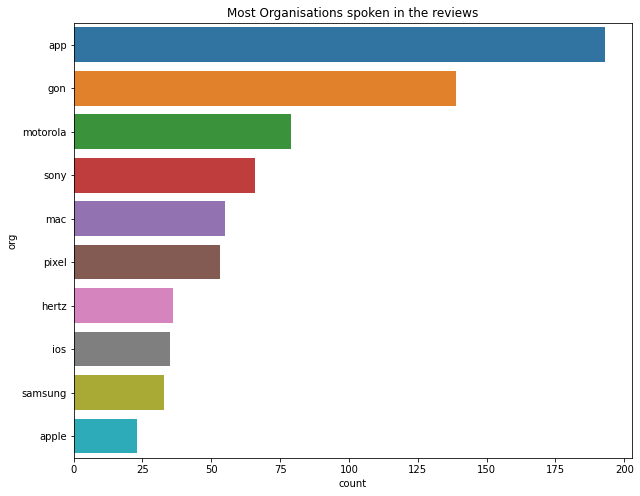

In [58]:
plt.figure(figsize=(10,8))
plt.title("Most Organisations spoken in the reviews")
sns.barplot(x="count", y="org", data=orgdfTop10)

In [59]:
def cleanwithSpacy(text):
    for char in '!#$%&@?,.:;+-*/=<>"\'()[\\]X{|}~\n\t¦¡§':
        text = text.replace(char, '')
    text = text.lower()
    doc = nlp(text)
    words = ''
    for token in doc:
        if(token.is_stop == False):
            words = words + ' ' + token.text
    return words

In [60]:
df2 = df
for i in df2.index:
    df2.at[i,'textWithoutStop'] = cleanwithSpacy(df2.iloc[i]['text'])

In [61]:
cou_vec = CountVectorizer(stop_words='english', max_df = 0.85, min_df =5)
tfidf = cou_vec.fit_transform(df2['textWithoutStop'])

In [62]:
lda_model = LDA(n_components=3, random_state = 42)
lda_fit = lda_model.fit(tfidf)
terms = cou_vec.get_feature_names()
topicList_lda = []
for i, comp in enumerate(lda_model.components_):
    #print(f"The topic would be {id_value}")
    lda = [terms[index] for index in comp.argsort()[:10]]
    #print(lis)
    topicList_lda.append(lda)
results = lda_model.transform(tfidf)

In [63]:
topicList_lda

[['living',
  'premiere',
  'earbuds',
  'earbud',
  'wire',
  'inline',
  'jaybird',
  'warp',
  'm50',
  'files'],
 ['predictable',
  'blurry',
  'nexuses',
  'warp',
  'mono',
  'pushes',
  'attempts',
  '3a',
  'nowadays',
  'mate'],
 ['living',
  'adobe',
  'hdmi',
  'stupid',
  'books',
  'tomorrow',
  'inline',
  'website',
  'm50',
  'nvidia']]

In [65]:
lsi_model = TruncatedSVD(n_components=3, random_state = 42)
lsi_fit = lsi_model.fit(tfidf)
terms = cou_vec.get_feature_names()
topicList_lsi= []
for i, comp in enumerate(lsi_model.components_):
    #print(f"The topic would be {id_value}")
    lsi = [terms[index] for index in comp.argsort()[:5]]
    #print(lis)
    topicList_lsi.append(lsi)
results_lsi= lsi_model.transform(tfidf)

In [66]:
topicList_lsi

[['marquez', 'signing', 'ratings', 'backward', 'stupid'],
 ['phone', 'galaxy', 'samsung', 'note', 'android'],
 ['iphone', 'phone', 'camera', '10', 'plus']]

In [72]:
import pyLDAvis
import json
import pyLDAvis.sklearn
data = pyLDAvis.sklearn.prepare(lda_model, tfidf, cou_vec)

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [73]:
pyLDAvis.display(data)

In [74]:
# import json
# pyLDAvis.save_html(data, 'output_filename.html')